#### Importing the Libraries

In [30]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For Arima
import pmdarima
import statsmodels.tsa.api as smt
## For Lstm
#from tensorflow.keras import models, layers, preprocessing as kprocessing
## For Prophet
from fbprophet import Prophet
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})


Reading the data and removing the commas in the numbers
thousands = ',' does that work . Converts 11,234 to 11234

In [31]:

dtf = pd.read_csv('C:\\Users\\garvi\\OneDrive\\Documents\\Nifty 50 Historical Data.csv',thousands=',')

dtf.head()

Date     Price      Open      High       Low     Vol. Change %
0  Jul 17, 2020  10901.70  10752.00  10933.45  10749.65  676.88K    1.51%
1  Jul 16, 2020  10739.95  10706.20  10755.30  10595.20  694.40K    1.15%
2  Jul 15, 2020  10618.20  10701.00  10827.45  10577.75  715.90K    0.10%
3  Jul 14, 2020  10607.35  10750.85  10755.65  10562.90  532.37K   -1.81%
4  Jul 13, 2020  10802.70  10851.85  10894.05  10756.05  554.05K    0.32%

We can see how the data looks
***But there is some problem in the data***
The data starts from the 2020 and goes back to year 2009. So if we will plot this data on the graph eith time on x-axis the graphs will start from 2020 at the origin and go to 2009 on further right

So we will need to invert the dataset

In [32]:
dtf.describe()

Price          Open          High           Low
count   2854.000000   2854.000000   2854.000000   2854.000000
mean    7559.703048   7564.699229   7607.052961   7511.518676
std     2409.058418   2414.255461   2415.876553   2404.185410
min     2573.150000   2574.500000   2621.250000   2539.450000
25%     5456.137500   5456.262500   5495.200000   5414.075000
50%     7619.150000   7636.050000   7678.650000   7580.650000
75%     9615.825000   9617.312500   9646.200000   9576.712500
max    12362.300000  12430.500000  12430.500000  12321.400000

We can see that the **Mean Open** is higher than the **Price Mean**. Which indicated that the Markets on average opened higher than the closing price.

*The computation of the CNX Nifty closing price is done by taking the weighted- average closing prices of the stocks that constitute the index during the last half an hour i.e. from 3:00 pm to 3:30 pm for every trading session.*

Now we are converting the dates to DateTime Format so that the models understand that there is Date involved and
***code for inverting the data upside down***

In [33]:
dtf["Date"] = pd.to_datetime(dtf["Date"],infer_datetime_format=True)

dtf =dtf.iloc[::-1]


Rename the features: These names are needed for the model fitting. We will only use the Adjusted Closing price for this study

In [34]:

dtf = dtf[["Date","Price"]]
dtf = dtf.rename(columns = {"Date":"ds","Price":"y"}) #renaming the columns of the dataset

Lets see how the data now looks -> *See now the data starts from year 2009*

In [35]:
dtf.head()

ds        y
2853 2009-01-01  3033.45
2852 2009-01-02  3046.75
2851 2009-01-05  3121.45
2850 2009-01-06  3112.80
2849 2009-01-07  2920.40

Creating a Prophet Model, with ***daily_seasonality = True*** as we want the Prophet to understand that there can be some seasonality in the Prices. Here we are hoping that during the certain months of the year the Nifty50 have an impact of festivals, Quarterly results (Also called as Earning Season)

In [36]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
#m = Prophet()
m.fit(dtf) # fit the model using all data

In [37]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the NSE50 using the Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

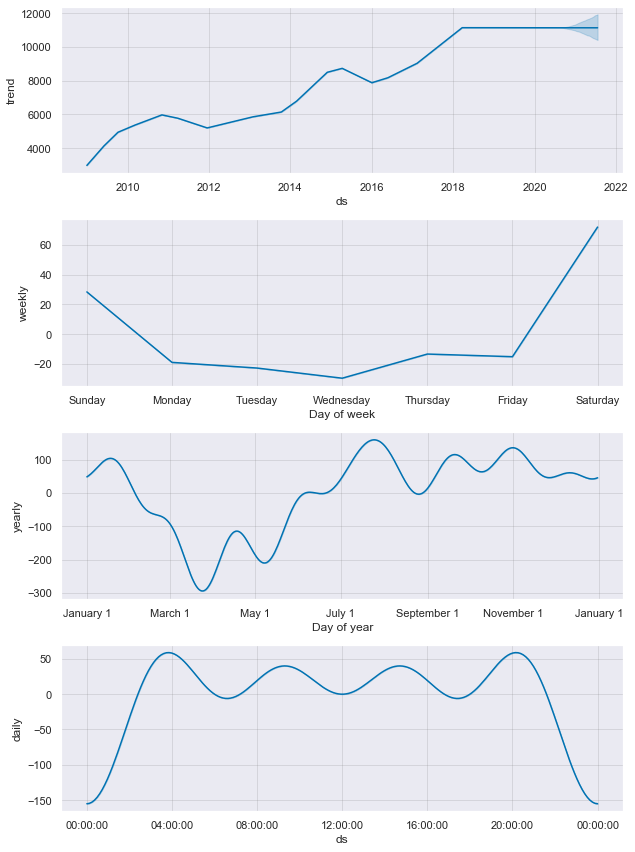

In [38]:
m.plot_components(prediction)
plt.show()

In [39]:
# selecting Date till 2018 for training and 2018-2019 as testing
train = (dtf['ds'] <'2018-12-31') 
train = dtf.loc[train]
test =  (dtf['ds'] >'2018-12-31') & (dtf['ds']<'2019-12-31')
test = dtf.loc[test]

In [40]:
train.head()


ds        y
2853 2009-01-01  3033.45
2852 2009-01-02  3046.75
2851 2009-01-05  3121.45
2850 2009-01-06  3112.80
2849 2009-01-07  2920.40

In [41]:
train.tail()

ds         y
384 2018-12-21  10754.00
383 2018-12-24  10663.50
382 2018-12-26  10729.85
381 2018-12-27  10779.80
380 2018-12-28  10859.90

In [42]:
test.head()

ds         y
378 2019-01-01  10910.10
377 2019-01-02  10792.50
376 2019-01-03  10672.25
375 2019-01-04  10727.35
374 2019-01-07  10771.80

In [43]:
test.tail()

ds         y
140 2019-12-23  12262.75
139 2019-12-24  12214.55
138 2019-12-26  12126.55
137 2019-12-27  12245.80
136 2019-12-30  12255.85

In [44]:
#Fit model using train data
model = Prophet(daily_seasonality = True) # the Prophet class (model)
#model = Prophet()
model.fit(train) # fit the model using all data

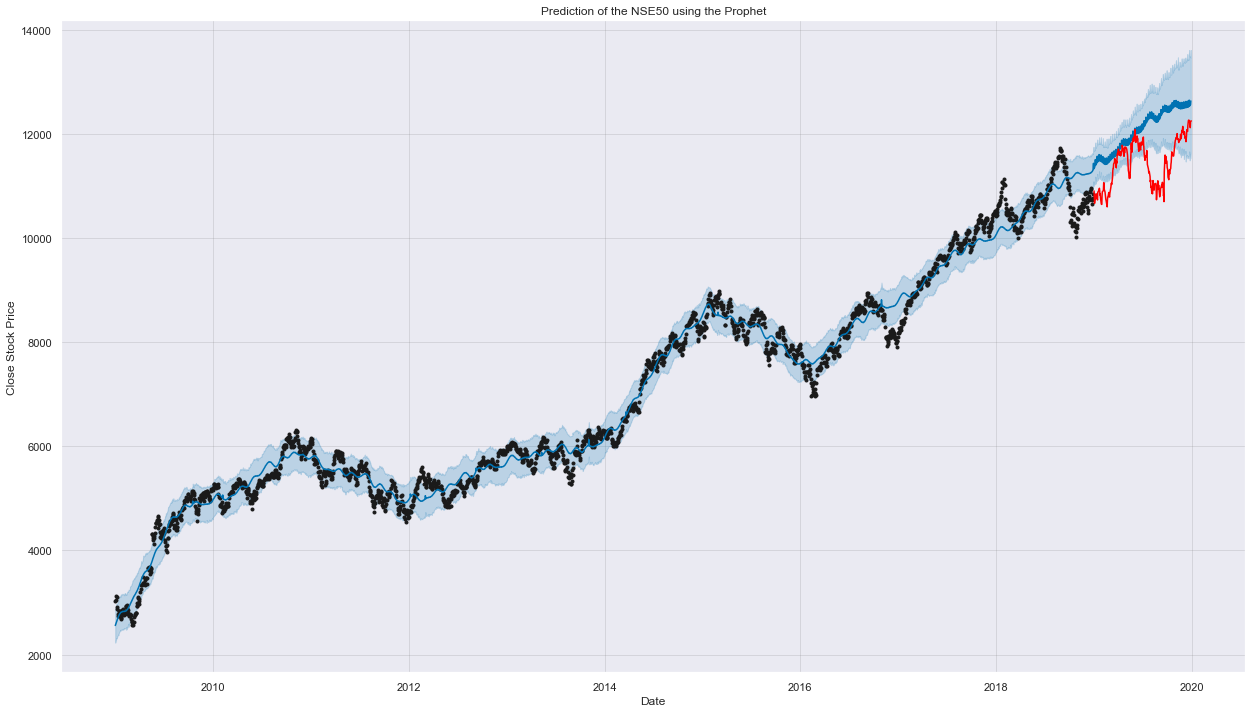

In [20]:
future = model.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = model.predict(future)
model.plot(prediction)
plt.title("Prediction of the NSE50 using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.plot(test['ds'],test['y'],color='red')
#plt.savefig('myfig.png')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=300)
plt.show()


In [45]:
model.plot_components(prediction)
plt.show()

In [63]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
fig = plot_plotly(model, prediction)

py.iplot(fig)


In [47]:
prediction

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2009-01-01   2978.891689   2301.745995   3431.026874   2978.891689   
1    2009-01-02   2986.484353   2313.709833   3386.563239   2986.484353   
2    2009-01-05   3009.262345   2349.976152   3429.660415   3009.262345   
3    2009-01-06   3016.855009   2343.752596   3438.145157   3016.855009   
4    2009-01-07   3024.447673   2336.366114   3463.148576   3024.447673   
...         ...           ...           ...           ...           ...   
3214 2021-07-13  11127.264228  10171.689528  12026.702662  10422.887361   
3215 2021-07-14  11127.258629  10151.858484  11947.165071  10420.638506   
3216 2021-07-15  11127.253030  10226.184175  12037.244268  10418.114012   
3217 2021-07-16  11127.247431  10166.853783  12028.758220  10413.412740   
3218 2021-07-17  11127.241833  10251.064278  12159.050855  10408.711468   

       trend_upper  additive_terms  additive_terms_lower  \
0      2978.891689     -120.572662           -120.572662   
1      2986.484353     -119.627972           -119.627972   
2      3009.262345     -112.818804           -112.818804   
3      3016.855009     -112.469706           -112.469706   
4      3024.447673     -114.937108           -114.937108   
...            ...             ...                   ...   
3214  11913.604704      -57.232757            -57.232757   
3215  11918.688696      -58.358338            -58.358338   
3216  11923.161865      -36.747663            -36.747663   
3217  11925.709939      -33.562138            -33.562138   
3218  11928.077621       58.235697             58.235697   

      additive_terms_upper       daily  ...     weekly  weekly_lower  \
0              -120.572662 -155.152826  ... -13.461511    -13.461511   
1              -119.627972 -155.152826  ... -15.240954    -15.240954   
2              -112.818804 -155.152826  ... -19.064742    -19.064742   
3              -112.469706 -155.152826  ... -22.887973    -22.887973   
4              -114.937108 -155.152826  ... -29.718686    -29.718686   
...                    ...         ...  ...        ...           ...   
3214            -57.232757 -155.152826  ... -22.887973    -22.887973   
3215            -58.358338 -155.152826  ... -29.718686    -29.718686   
3216            -36.747663 -155.152826  ... -13.461511    -13.461511   
3217            -33.562138 -155.152826  ... -15.240954    -15.240954   
3218             58.235697 -155.152826  ...  72.015127     72.015127   

      weekly_upper      yearly  yearly_lower  yearly_upper  \
0       -13.461511   48.041675     48.041675     48.041675   
1       -15.240954   50.765808     50.765808     50.765808   
2       -19.064742   61.398764     61.398764     61.398764   
3       -22.887973   65.571092     65.571092     65.571092   
4       -29.718686   69.934404     69.934404     69.934404   
...            ...         ...           ...           ...   
3214    -22.887973  120.808041    120.808041    120.808041   
3215    -29.718686  126.513174    126.513174    126.513174   
3216    -13.461511  131.866674    131.866674    131.866674   
3217    -15.240954  136.831642    136.831642    136.831642   
3218     72.015127  141.373396    141.373396    141.373396   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
3214                   0.0                         0.0   
3215                   0.0                         0.0   
3216                   0.0                         0.0   
3217                   0.0                         0.0   
3218                   0.0                         0.0   

      multiplicative_terms_upper          yhat  
0                            0.0   

In [62]:
plt.plot(prediction['ds'], prediction[['yhat_lower','yhat_upper','yhat']],linewidth=1.0, label=['predicted lower and upper bound with predicted value'])
plt.ylabel('Nifty50 value')
plt.plot(train['ds'],train['y'],color='black',linewidth=1.0,label='Training Data')
plt.plot(test['ds'],test['y'],linewidth=1.0, label = "Test Data")
plt.legend(loc='lower center', ncol=2)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('predicted.png', dpi=300)
plt.plot()
plt.show()

In [49]:
def fit_prophet(train, test, lst_exog=None, model=None, 
                freq="D", figsize=(15,10)):
    ## train
    model2 = Prophet(daily_seasonality = True) # the Prophet class (model)
    #model2 = Prophet()
    model2.fit(train)
    
    ## test
    dtf_prophet = model.make_future_dataframe(periods=len(test), 
                  freq=freq, include_history=True)
    dtf_prophet = model.predict(dtf_prophet)
    train = train.merge(dtf_prophet[["ds","yhat"]], 
                how="left").rename(columns={'yhat':'model', 
                'y':'ts'}).set_index("ds")
    test = test.merge(dtf_prophet[["ds","yhat"]], 
                how="left").rename(columns={'yhat':'forecast',  
                'y':'ts'}).set_index("ds")
    
    ## evaluate
    dtf = train.append(test)
    dtf = utils_evaluate_forecast(dtf, figsize=figsize, 
                                  title="Prophet")
    return dtf, model

In [50]:
def utils_evaluate_forecast(dtf, title, plot=True, figsize=(20,13)):
    try:
        ## residuals
        dtf["residuals"] = dtf["ts"] - dtf["model"]
        dtf["error"] = dtf["ts"] - dtf["forecast"]
        dtf["error_pct"] = dtf["error"] / dtf["ts"]
        
        ## kpi
        residuals_mean = dtf["residuals"].mean()
        residuals_std = dtf["residuals"].std()
        error_mean = dtf["error"].mean()
        error_std = dtf["error"].std()
        mae = dtf["error"].apply(lambda x: np.abs(x)).mean()
        mape = dtf["error_pct"].apply(lambda x: np.abs(x)).mean()  
        mse = dtf["error"].apply(lambda x: x**2).mean()
        rmse = np.sqrt(mse)  #root mean squared error
        
        ## intervals
        dtf["conf_int_low"] = dtf["forecast"] - 1.96*residuals_std
        dtf["conf_int_up"] = dtf["forecast"] + 1.96*residuals_std
        dtf["pred_int_low"] = dtf["forecast"] - 1.96*error_std
        dtf["pred_int_up"] = dtf["forecast"] + 1.96*error_std
        
        ## plot
        if plot==True:
            fig = plt.figure(figsize=figsize)
            fig.suptitle(title, fontsize=20)   
            ax1 = fig.add_subplot(2,2, 1)
            ax2 = fig.add_subplot(2,2, 2, sharey=ax1)
            ax3 = fig.add_subplot(2,2, 3)
            ax4 = fig.add_subplot(2,2, 4)
            ### training
            dtf[pd.notnull(dtf["model"])][["ts","model"]].plot(color=["black","green"], title="Model", grid=True, ax=ax1)      
            ax1.set(xlabel=None)
            ### test
            dtf[pd.isnull(dtf["model"])][["ts","forecast"]].plot(color=["black","red"], title="Forecast", grid=True, ax=ax2)
            ax2.fill_between(x=dtf.index, y1=dtf['pred_int_low'], y2=dtf['pred_int_up'], color='b', alpha=0.2)
            ax2.fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)     
            ax2.set(xlabel=None)
            ### residuals
            dtf[["residuals","error"]].plot(ax=ax3, color=["green","red"], title="Residuals", grid=True)
            ax3.set(xlabel=None)
            ### residuals distribution
            dtf[["residuals","error"]].plot(ax=ax4, color=["green","red"], kind='kde', title="Residuals Distribution", grid=True)
            ax4.set(ylabel=None)
            plt.show()
            print("Training --> Residuals mean:", np.round(residuals_mean), " | std:", np.round(residuals_std))
            print("Test --> Error mean:", np.round(error_mean), " | std:", np.round(error_std),
                  " | mae:",np.round(mae), " | mape:",np.round(mape*100), "%  | mse:",np.round(mse), " | rmse:",np.round(rmse))
        
        return dtf[["ts","model","residuals","conf_int_low","conf_int_up", 
                    "forecast","error","pred_int_low","pred_int_up"]]
    
    except Exception as e:
        print("--- got error ---")
        print(e)

In [51]:
dtf, model = fit_prophet(train, test, model=model, freq="D")

Training --> Residuals mean: -0.0  | std: 260.0
Test --> Error mean: -502.0  | std: 399.0  | mae: 504.0  | mape: 5.0 %  | mse: 409786.0  | rmse: 640.0
